# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** XX mins presenting + YY mins exercises

## Chapter 5: A very basic introduction into machine learning

<font face='Times New Roman' color=red>This notebook will probably need to be run on Google colab or the like, as laptops might not have the right architecture to run this.</font>

### Outline of this mini-workshop

- Mini lecture about Machine Learning  
    - /Users/m.wehrens/Documents/PRESENTATIONS/TEACHING/ML_verybasic.pptx
- Draw your own images
- Understand some outputs of this notebook
- Questions



### Draw 4 images

Open FIJI and create a new 12x12 8bit image. Use the paintbrush tool and color picker to draw four images. Draw 2 images depicting one thing, and two images depicting another thing. E.g. draw 2 images of an apple and two images of a pear. Only spend a few minutes on this. (You can also draw something easier, like numbers, symbols, letters, etc.)

### Run some code

The code below uses pytorch to set up a very simple neural network. "Real" neural networks have a much more complicated architecture. The purpose here is to be able to follow along what's happening in a neural network.

##### Understanding, but not the technical details
The code has some explanatory comments, but it takes too much time to explain fully how pytorch or similar neural network libraries (like tensorflow or keras) work. You're welcome to try and understand the code, but don't get lost in it, the main goal is to understand the concepts of machine learning.

In [14]:
import torch
from torch import nn

from torch.utils.data import Dataset

import numpy as np

import tifffile as tiff
import matplotlib.pyplot as plt

In [141]:
# This code defines a VERY simple model for 12x12 pixels,
# meant for illustratory purposes.

class VerySimpleNN(nn.Module):
    # Pytorch makes use of classes, which are a way to group
    # data and functions together. A class specifies what functions 
    # the class provides, and what data (like parameters) it stores.
    # An object can then be created to actually load data and 
    # call those functions.
    # As an analogy, class definitions are the "blueprint",
    # objects instantiated from the class are the "houses".
    #
    # Here, we define a class (blueprint) for our simple
    # neural network.
    #
    # To learn more about classes, e.g. google for a tutorial on
    # Python classes.
    
    def __init__(self):
        # __init__ is a standard class method, which is 
        # automatically called when an object is created.
        #
        # In this case, it defines how (the layers 
        # of) the network should look.
        
        # technical; calls init of parent class
        super().__init__() 
        
        # Define a flatten function, which in this case
        # can flatten the input (the image) to a 144 element vector
        self.flatten = nn.Flatten() 
        
        # Define a linear layer, which will
        # calculate weights*pixels for 144 element input and 2 output elements
        self.linear = nn.Linear(12*12, 2) 

    def forward(self, x):
        
        # The forward function can be called later to actually
        # generate a prediction.
        # It will use the "components" we defined in __init__.
        # (This is useful when the network is more complicated,
        # and more complex structures or components are defined in __init__, and 
        # the forward function will be less complex.)        
        
        # Now actually use the flatten function to convert
        # the 12x12 input to a 1d 144 long vector.
        x = self.flatten(x)        
            # technical note:
            # typically, input will be supplied in batches,
            # so the input shape will be (batchsize, 12, 12)
            # and the output shape will be (batchsize, 144)
            
        # Now use the linear layer to calculate the 2 element output
        logits = self.linear(x)
        
        return logits

###
# Now test the neural network

# Instantiate the neural network (create an object from the class)
# Technical note: ".to('mps')" tells the computer to run this network
# on an Apple GPU.
simpleNN = VerySimpleNN().to('mps')

# Generate a random 12x12 image
test_data = torch.rand(1, 12, 12, device='mps')  
# Generate a prediction; calling the object will automatically 
# call the forward function (since this is a pytorch class)
# Alternatively, you could also call simpleNN.forward(test_data) 
pred = simpleNN(test_data)
pred_numpy = pred.cpu().detach().numpy()
# Print the prediction
print('pred = \"',pred, '\" (pytorch tensor format)')
print('pred_numpy = \"',pred_numpy,'\" (numpy format)')

pred = " tensor([[-0.2730, -0.1362]], device='mps:0', grad_fn=<LinearBackward0>) " (pytorch tensor format)
pred_numpy = " [[-0.2730191  -0.13620886]] " (numpy format)


## Remarks & Questions

#### Tensors

As you can see the output has the type `tensor`. This is an internal data structure of pytorch, which is similar to a numpy array. The reason we're using these 'special' arrays is (1) that their technical setup allows for calculating the "gradient" ($\delta\text{loss}/\delta w$) used to update the weights $w$ and (2) they can be put on GPUs, which can speed up calculations a lot.

#### Questions
- What role does $\delta\text{loss}/\delta w$ play in neural networks?
- This questions regards the code under the heading "# Now test the neural network" above. Can you describe in your own terms what 
    - The input we give to the network looks like here?
    - What the output of the neural network looks like?
- If we were to provide actual images to this network, do you think it would be able to generate meaningful predictions? Why would it (not)?

In [154]:
# Since this network is so simple, we can manually calculate it's outcome

# Now acquire the weights stored in the neural network
# And convert them from tensors to numpy
weights = simpleNN.linear.weight.detach().cpu().numpy()
bias    = simpleNN.linear.bias.detach().cpu().numpy()
    # bias is a constant term that's added to the weighted sum

# Also convert the test data to numpy
test_data_np = test_data.cpu().numpy().flatten()

# Perform the calculation
output_element1 = np.sum(test_data_np * weights[0]) + bias[0]
output_element2 = np.sum(test_data_np * weights[1]) + bias[1]
print(output_element1, ', ', output_element2)


-0.27301913 ,  -0.13620889


### Question

- What does the calculation look like that is done inside the neural network, to get from the input elements, to the output elements?

### Exercise: load your images

Adapt the code below to load the images you were asked to draw earlier.

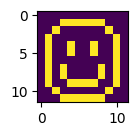

In [ ]:
# Let's load some potential input and training data
#
# Here, we'll load only the few images you just created. 
#
# In reality, training sets are very large.
# For example, the MNIST dataset has 60,000 training images.
# (https://en.wikipedia.org/wiki/MNIST_database)

# Two image paths
img_happy_path = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/smile.tif'
img_sad_path   = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/sad.tif'
img_sad2_path   = '/Users/m.wehrens/Documents/git_repos/_UVA/2025_teaching_Py_image-analysis/Workshop_Py_image-analysis_2025/images/ML/sad2.tif'

# Load images
img_happy = tiff.imread(img_happy_path)
img_sad   = tiff.imread(img_sad_path)
img_sad2  = tiff.imread(img_sad2_path)

# Show one image
fig, ax = plt.subplots(1,1, figsize=(3/2.54, 3/2.54))
_=ax.imshow(img_happy)

### Seaborn plotting (can be skipped)

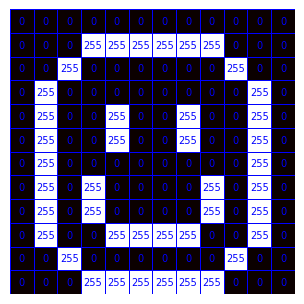

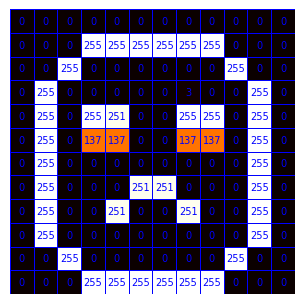

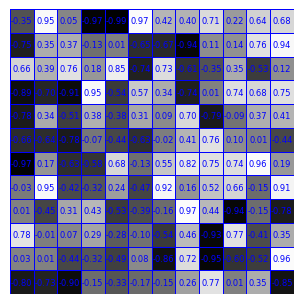

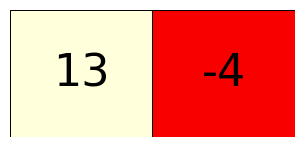

In [ ]:
# Let's use seaborn to create some more sophisticated plots
import seaborn as sns
def mw_showimg2(img, annotcolor='white',SX=8,SY=8,SF=7,VMIN=0,VMAX=255, CMAP='hot', FMT="d"):
    fig, ax = plt.subplots(1,1, figsize=(SX/2.54, SY/2.54))
    _ = sns.heatmap(img, annot=True,
                fmt=FMT, 
                cmap=CMAP, 
                annot_kws={"size": SF, "color": annotcolor},
                vmin=VMIN, vmax=VMAX,
                linewidths=.5, linecolor=annotcolor,
                ax=ax)
    ax.axis('off')
    ax.collections[0].colorbar.remove()
    plt.tight_layout()
    
# Plot the images
mw_showimg2(img_happy, annotcolor='blue')
mw_showimg2(img_sad2, annotcolor='blue')
# Plot some made-up weights
img_randomweights = np.random.uniform(-1, 1, (12, 12))
mw_showimg2(img_randomweights, annotcolor='blue', SF=6,VMIN=-1,VMAX=1.0, FMT=".2f", CMAP='gray')
# Plot some made-up output
mw_showimg2(np.array([[13,-4]]), annotcolor='black', SY=4, SF=32,VMIN=-14,VMAX=14,CMAP='hot')# gray

### Math (can be skipped)

For a prediction y_j, where j is referring to the categories that need predicting (e.g. $y_1$ high means a "happy" emoji, and a high $y_2$ value indicates the emoji is likely "sad"), $y_j$ values can be calculated from the $i\text{th}$ image pixel $x_i$ as follows (with $w_{i,j}$ being the weights):

$\huge y_j = \sum_{i} w_{i,j} * x_i$


### Defining a data loader

To train a model, pytorch needs to be able to quickly look at a load of data efficiently. In the pytorch workflow, a data class is defined, such that training data can be stored in tensor format, and can be supplied easily to the training algorithm later.

### Exercise

- Can

In [ ]:
class Data_HappySad(Dataset):
    # Again, we use a class, see above for an explanation.
    # (Remember the blueprint/house analogy.)
    #
    # This class is based on the pytorch "Dataset" class, defined
    # in the pytorch library. Data_HappySad is the name we 
    # give to this class. Hence the notation "Data_HappySad(Dataset)".
    
    def __init__(self, targetdevice="mps"):
        
        # Technical: tell the class how to store the data (e.g. on CPU or GPU)
        self.targetdevice = targetdevice
        
        # Data and its labels, 0 = happy, 1 = sad
        self.data   = torch.tensor([img_happy, img_sad, img_sad2], 
                                   dtype=torch.float32)
        self.label  = torch.tensor([0        , 1,       1], 
                                   dtype=torch.long)
        
        # Normalize images
        self.data = self.data / 255.0
    
    def __len__(self):
        
        return len(self.data)
    
    def __getitem__(self, idx):
        
        return self.data[idx].to(self.targetdevice), self.label[idx].to(self.targetdevice)
        
        

In [158]:
# initialize the dataset and dataloader objects
my_data_happysad = Data_HappySad()
my_data_happysad_loader = torch.utils.data.DataLoader(my_data_happysad, 
                                                      batch_size=3, shuffle=False)

# initialize the model
my_simple_model  = VerySimpleNN().to('mps') 

In [85]:
my_data_happysad.__getitem__(0)

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
         [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
         [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
         [0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.]], device='mps:0'),
 tensor(0, device='mps:0'))

In [92]:
# now make a simple train loop
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_simple_model.parameters(), lr=.01)

# set model to training mode
my_simple_model.train()

gradient_list = [] # only for illustratory purposes
weight_list   = [] # only for illustratory purposes
for epoch_idx in range(300):
    
    for b_idx, (X,y) in enumerate(my_data_happysad_loader): 

        # store the weight history as an array (for illustratory purposes)
        weights = my_simple_model.linear.weight.detach().cpu().numpy()
        weight_list.append(weights)
    
        pred = my_simple_model(X)
        loss = loss_fn(pred, y)
        
        loss.backward() # compute gradients                
    
        # get the gradients as array (for illustratory purposes)
        gradients = my_simple_model.linear.weight.grad.detach().cpu().numpy()
        gradient_list.append(gradients)
    
        optimizer.step() # apply gradients
        optimizer.zero_grad() # reset gradients
    
        print('epoch =', epoch_idx, 'batch =',b_idx,', loss = ', loss.item())#, 'X.shape=', X.shape)
        

    
    

epoch = 0 batch = 0 , loss =  0.7386760115623474
epoch = 1 batch = 0 , loss =  0.7059815526008606
epoch = 2 batch = 0 , loss =  0.6275319457054138
epoch = 3 batch = 0 , loss =  0.587015688419342
epoch = 4 batch = 0 , loss =  0.5479636788368225
epoch = 5 batch = 0 , loss =  0.4967827796936035
epoch = 6 batch = 0 , loss =  0.45313093066215515
epoch = 7 batch = 0 , loss =  0.42170920968055725
epoch = 8 batch = 0 , loss =  0.3932683765888214
epoch = 9 batch = 0 , loss =  0.36235275864601135
epoch = 10 batch = 0 , loss =  0.3322426974773407
epoch = 11 batch = 0 , loss =  0.30743467807769775
epoch = 12 batch = 0 , loss =  0.2879260182380676
epoch = 13 batch = 0 , loss =  0.2701059579849243
epoch = 14 batch = 0 , loss =  0.2516283690929413
epoch = 15 batch = 0 , loss =  0.23327738046646118
epoch = 16 batch = 0 , loss =  0.2169242650270462
epoch = 17 batch = 0 , loss =  0.20332233607769012
epoch = 18 batch = 0 , loss =  0.19168514013290405
epoch = 19 batch = 0 , loss =  0.18073689937591553
epo

Text(0.5, 0.98, 'Weight evolution for "sad" class')

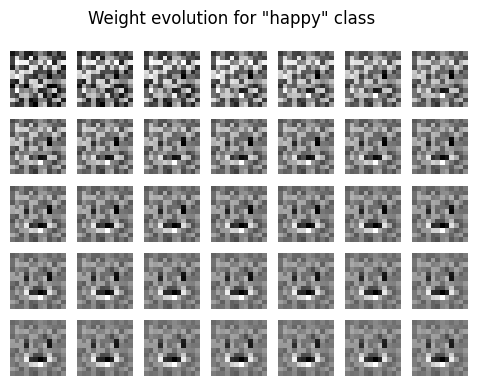

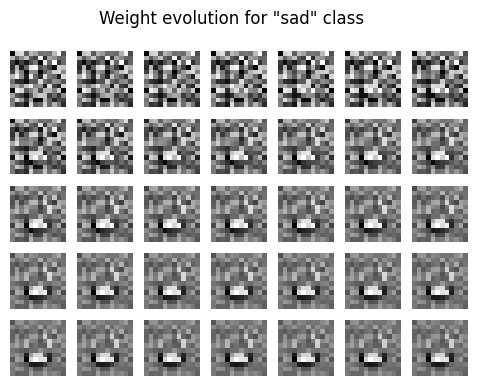

In [93]:
# visualize the weights
TO_SHOW_NR = 35
fig, axs = plt.subplots(TO_SHOW_NR//7, 7, figsize=(15/2.54, 15/2.54*(TO_SHOW_NR//7)/7))
# show the weights of weight_list[X][0] in a 5 x 7 grid
for weight_iteration in range(TO_SHOW_NR):
    pos_X = weight_iteration//7
    pos_Y = weight_iteration%7
    _ = axs[pos_X,pos_Y].imshow(weight_list[weight_iteration][0].reshape(12,12), cmap='gray')
    _ = axs[pos_X,pos_Y].axis('off')
plt.suptitle('Weight evolution for "happy" class')

# now the same for the "sad" class
fig, axs = plt.subplots(TO_SHOW_NR//7, 7, figsize=(15/2.54, 15/2.54*(TO_SHOW_NR//7)/7))
# show the weights of weight_list[X][1] in a 5 x 7 grid
for weight_iteration in range(TO_SHOW_NR):
    pos_X = weight_iteration//7
    pos_Y = weight_iteration%7
    _ = axs[pos_X,pos_Y].imshow(weight_list[weight_iteration][1].reshape(12,12), cmap='gray')
    _ = axs[pos_X,pos_Y].axis('off')
plt.suptitle('Weight evolution for "sad" class')
                                                   


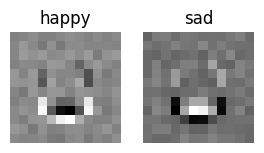

In [95]:
# show the final weights as images
fig, axs = plt.subplots(1,2, figsize=(8/2.54, 4/2.54))
_=axs[0].imshow(weight_list[-1][0].reshape(12,12),cmap='gray')
_=axs[1].imshow(weight_list[-1][1].reshape(12,12),cmap='gray')
_=axs[0].set_title('happy')
_=axs[1].set_title('sad')
_=axs[0].axis('off')
_=axs[1].axis('off')
                

-0.828053 0.6682241


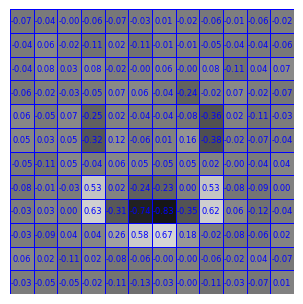

In [135]:
# Final weights in different style
print(np.min(weight_list[-1][0]), np.max(weight_list[-1][0]))
mw_showimg2(weight_list[-1][0].reshape((12,12)), 
            annotcolor='blue', VMIN=-1, VMAX=1.0, FMT=".2f", CMAP='gray', SF=6)

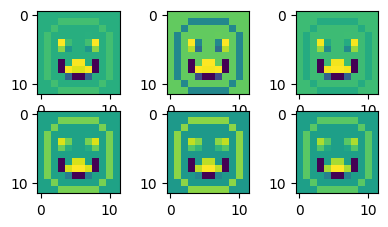

In [94]:
# show the first and second gradients
fig, axs = plt.subplots(2,3, figsize=(12/2.54, 6/2.54))
_=axs[0,0].imshow(gradient_list[0][0].reshape(12,12))
_=axs[0,1].imshow(gradient_list[1][0].reshape(12,12))
_=axs[0,2].imshow(gradient_list[2][0].reshape(12,12))
_=axs[1,0].imshow(gradient_list[3][0].reshape(12,12))
_=axs[1,1].imshow(gradient_list[4][0].reshape(12,12))
_=axs[1,2].imshow(gradient_list[5][0].reshape(12,12))

In [59]:
print(len(gradient_list))
gradient_list[0].shape
gradient_list[4][0].reshape((12,12)).shape

100


(12, 12)

In [60]:
# apply the model to image 1
X1 = my_data_happysad.__getitem__(0)[0].unsqueeze(0)
pred = my_simple_model(X1)
print('X1=', pred)
# and to image 2
X2 = my_data_happysad.__getitem__(1)[0].unsqueeze(0)
pred = my_simple_model(X2)
print('X12', pred)
# and to image 3
X3 = my_data_happysad.__getitem__(2)[0].unsqueeze(0)
pred = my_simple_model(X3)
print('X3=', pred)

X1= tensor([[ 2.0890, -1.5107]], device='mps:0', grad_fn=<LinearBackward0>)
X12 tensor([[-1.6538,  2.0169]], device='mps:0', grad_fn=<LinearBackward0>)
X3= tensor([[-2.6456,  3.4767]], device='mps:0', grad_fn=<LinearBackward0>)


In [61]:
# Doesn't seem to work ??
# from torchsummary import summary
# summary(my_simple_model, input_size=(12,12))

In [62]:
# There should be 12x12 + 1 + 12x12 + 1 = 290 model parameters
sum(p.numel() for p in my_simple_model.parameters() if p.requires_grad)

290